In [1]:
# qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import *

# math
import numpy as np
import matplotlib.pyplot as plt

# passManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# sim
from qiskit.providers.basic_provider import BasicProvider
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.primitives import BackendSampler

# sim(MPS)
from qiskit import  transpile
from qiskit_aer import AerSimulator

# IBMQ
#from qiskit_ibm_runtime import QiskitRuntimeService

In [2]:
#conditions = [
#    [2,3],
#    [3]
#]

# 誰が生き残るか
# 周りの生きている条件個数
# 下は生まれる条件の個数
conditions = [
    [1,2,3],
    [1,2]
]


from itertools import combinations 
#true falseの配列を作成
def generate_true_false_lists(length, true_count):
    # すべての可能な組み合わせを生成
    all_combinations = []
    for combo in combinations(range(length), true_count):
        new_list = [False] * length
        for index in combo:
            new_list[index] = True
        all_combinations.append(new_list)
    
    return all_combinations

#ルールパターンを生成
def make_rules(conditions,num_row,num_col,row,col):
    rules = list()
    if row == 0 & col == 0:
        rowlist = [row,row,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col+1,col,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)
    elif row == num_row & col == 0:
        rowlist = [row,row-1,row-1,row]
        rules.append(rowlist)
        collist = [col,col,col+1,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)       
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)   
    elif row == 0 & col == num_col:
        rowlist = [row,row,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col-1,col+1,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)          
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)      
    elif row == num_row & col == num_col:
        rowlist =  [row,row-1,row-1,row]
        rules.append(rowlist)
        collist =  [col,col-1,col,col-1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:

                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)            
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)         
    elif row == 0:
        rowlist =[row,row,row,row+1,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col-1,col+1,col-1,col,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)              
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)    
    elif row == num_row:
        rowlist =[row,row-1,row-1,row-1,row,row]
        rules.append(rowlist)
        collist = [col,col-1,col,col+1,col-1,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)                  
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)       
    elif col == 0:
        rowlist =[row,row-1,row-1,row,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col,col+1,col+1,col,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)            
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists) 
    elif col == num_col:
        rowlist =[row,row-1,row-1,row,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col-1,col,col-1,col-1,col]
        rules.append(collist)       
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)                   
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)            
    else:
        rowlist = [row,row-1,row-1,row-1,row,row,row+1,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col-1,col,col+1,col-1,col+1,col-1,col,col+1]
        rules.append(collist)
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(8,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)               
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(8,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists) 
    return rules

#cが複数の場合のnot処理
def cnnot(circ,n,ctrl,anc,tgt):
    # compute
    circ.ccx(ctrl[0], ctrl[1], anc[0])
    for i in range(2, n):
        circ.ccx(ctrl[i], anc[i-2], anc[i-1])

    # copy
    circ.cx(anc[n-2], tgt[0])

    # uncompute
    for i in range(n-1, 1, -1):
        circ.ccx(ctrl[i], anc[i-2], anc[i-1])
    circ.ccx(ctrl[0], ctrl[1], anc[0])

    return circ

#n/m二次元での表記を1字配列の量子に当てはめる
def convert_2d_to_1d(row, col, num_rows, num_cols):
    return row * num_cols + col

#量子の一次元配列を2次平面に変換
def convert_1d_to_2d(index, num_cols):
    row = index // num_cols
    col = index % num_cols
    return row, col

#パターンを実際に当てはめて、量子に書き込む
def add_rules(conditions,n,m,timesteps,circ,qpos,anc,cbit):
    #qpos = circ.qreg[0]
    #anc = circ.qreg(anc)[1]
    for timestep in range(timesteps-1):
        for i in range(n):
            for j in range(m):
                rules = make_rules(conditions,n,m,i,j) 
                for rule in rules[2:]:
                    ctrl = list()
                    for k in range(len(rule)):
                        ctrl.append(qpos[n * m* timestep + convert_2d_to_1d(rules[0][k],rules[1][k],n,m)])
                        if not rule[k]:
                            circ.x(qpos[n * m* timestep + convert_2d_to_1d(rules[0][k],rules[1][k],n,m)])
                    tgt = list()
                    tgt.append(qpos[n * m* (timestep+1) + convert_2d_to_1d(i,j,n,m)])
                    cnnot(circ,len(ctrl),ctrl,anc,tgt)
                    for k in range(len(rule)):
                        if not rule[k]:
                            circ.x(qpos[n * m* timestep + convert_2d_to_1d(rules[0][k],rules[1][k],n,m)])
    for i in range(0, timesteps * n * m):
        circ.measure(i,i)

#from qiskit.tools.visualization import circuit_drawer
#circuit_drawer(circ)
#    return rules
print(make_rules(conditions,50,40,30,20))

[[30, 29, 29, 29, 30, 30, 31, 31, 31], [20, 19, 20, 21, 19, 21, 19, 20, 21], [True, True, False, False, False, False, False, False, False], [True, False, True, False, False, False, False, False, False], [True, False, False, True, False, False, False, False, False], [True, False, False, False, True, False, False, False, False], [True, False, False, False, False, True, False, False, False], [True, False, False, False, False, False, True, False, False], [True, False, False, False, False, False, False, True, False], [True, False, False, False, False, False, False, False, True], [True, True, True, False, False, False, False, False, False], [True, True, False, True, False, False, False, False, False], [True, True, False, False, True, False, False, False, False], [True, True, False, False, False, True, False, False, False], [True, True, False, False, False, False, True, False, False], [True, True, False, False, False, False, False, True, False], [True, True, False, False, False, False, False,

In [3]:
# MPS : max 63qbit
# anc : 7
# cbit: 56
# 56 % 3^2 = 6
# 56 % 4^2 = 3
n = 4
m = 4
timesteps = 3
shots = 10240

qpos = QuantumRegister(n*m*timesteps,"qpos")
anc =  QuantumRegister(8,"anc") #周囲8マス-1
cbit = ClassicalRegister(n*m*timesteps,"cbit")
circ = QuantumCircuit(qpos,anc,cbit)

# 初期状態セット
circ.x(1)
circ.h(1)
circ.cx(1,2)

# 回路作成 
add_rules(conditions,n,m,timesteps,circ,qpos,anc,cbit)

#---MPS
simulator = AerSimulator(method='matrix_product_state')
tcirc = transpile(circ, simulator)
result = simulator.run(tcirc).result()
print("Time taken: {} sec".format(result.time_taken))
result.get_counts()

Time taken: 1.3016045093536377 sec


{'000100000001111111111000111100110000000000000110': 506,
 '000000000000000000000000000000000000000000000000': 518}

{'000100000001111111111000111100110000000000000110': 506, '000000000000000000000000000000000000000000000000': 518}
#---10240回計測後のgrid 
[[0.         0.04941406 0.04941406 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.04941406 0.04941406 0.         0.        ]
 [0.04941406 0.04941406 0.04941406 0.04941406]
 [0.         0.         0.         0.04941406]
 [0.04941406 0.04941406 0.04941406 0.04941406]
 [0.04941406 0.04941406 0.04941406 0.04941406]
 [0.04941406 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.04941406 0.         0.         0.        ]]


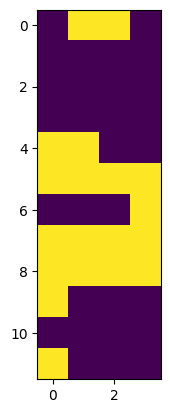

In [4]:
#---IBMQからJOB実行結果を再取得する場合
#job = service.job(job_id) 
#---results
counts = result.get_counts()

measured_bit = max(counts, key=counts.get)
print(counts)
plot_histogram(counts)

# Draw everything
grid = np.zeros((n * timesteps, m ))
#print(f'#---初期grid \n{grid}') # 調査用

for bitstring, cnt in counts.items():
    prob = cnt / shots
    for idx, c in enumerate(reversed(bitstring)):
        # print('#---')               # 調査用
        # print(f'idx={idx} c={c}')   # 調査用
        if c == '1':
            # print(f'idx/={idx // n} idx%={idx % n}')  # 調査用
            grid[idx // n, idx % n] += prob

print(f'#---{shots}回計測後のgrid \n{grid}') # 調査用

# heatmap
#plt.imshow(grid, interpolation='bilinear') 
plt.imshow(grid, interpolation='nearest')  

In [5]:
import qiskit
qiskit.__version__

'1.1.0'